<a href="https://colab.research.google.com/github/Mohammmedsaqib/Neural-Networks-And-Fuzzy-Logic/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT – 4


Title: Implementation of ANN based Binary classification using breast
cancer dataset.

Objective:
To implement and evaluate an Artificial Neural Network (ANN) for
binary classification using the Breast Cancer Wisconsin Diagnostic
Dataset.

• Data Loading and Preprocessing
a. Load the data set using sklearn. datasets.
b. Perform basic exploratory data analysis (EDA): check for
null values, describe statistics
c. Normalize/scale the features for better ANN performance

• Model Building

a. Build an ANN using Keras /Tensor Flow with:
o Input layer matching number of features
o Atleast one hidden layer
o Use ReLU for hidden layers, sigmoid for output
o Binary cross-entropy as the loss function
b. Compile and summarize the model

• Model Training and Evaluation

a. Split the data set into training and testing (e.g.,80-20split)
b. Train the model and plot training/validation accuracy and loss
c. Evaluate the model on test data: print accuracy,
confusion matrix, precision, recall, F1-score


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6971 - loss: 0.5815 - val_accuracy: 0.8791 - val_loss: 0.4125
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9027 - loss: 0.3880 - val_accuracy: 0.9231 - val_loss: 0.3188
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9366 - loss: 0.3120 - val_accuracy: 0.9341 - val_loss: 0.2602
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9567 - loss: 0.2377 - val_accuracy: 0.9451 - val_loss: 0.2206
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9549 - loss: 0.1913 - val_accuracy: 0.9451 - val_loss: 0.1957
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9518 - loss: 0.1661 - val_accuracy: 0.9670 - val_loss: 0.1768
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.1303 - val_accuracy: 0.9670 - val_loss: 0.1635
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.1232 - val_accuracy: 0.9560 - val_loss

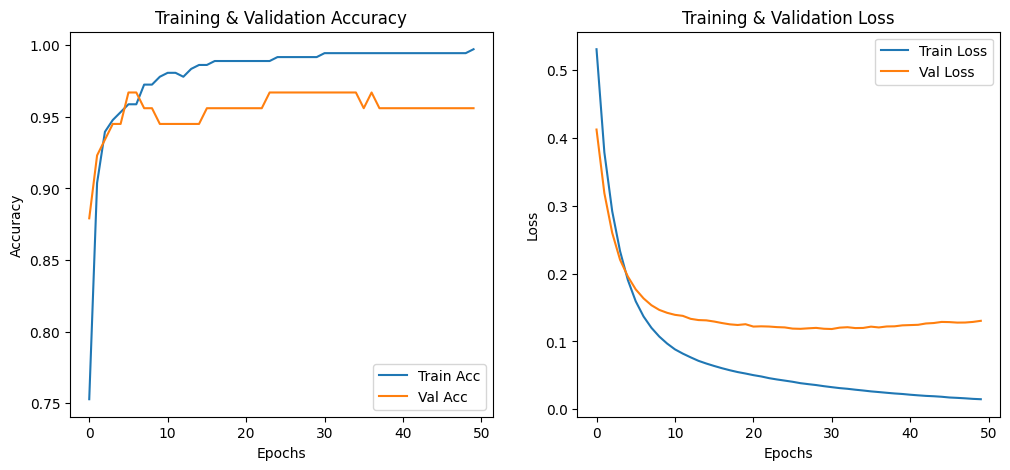

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Test Accuracy: 0.9824561403508771


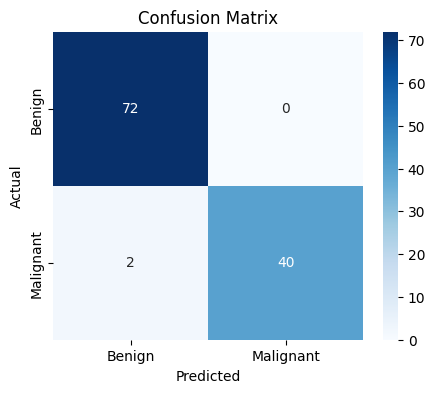


Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# --------------------------------------
# ANN for Binary Classification (Breast Cancer Dataset)
# --------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# ---------------------------
# 1. Load Data
# ---------------------------
df = pd.read_csv("data.csv")   # <-- update path if needed

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target (M=1 malignant, B=0 benign)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# ---------------------------
# 2. Data Preprocessing
# ---------------------------
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 3. Build ANN Model
# ---------------------------
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer
    Dense(16, activation='relu'),  # hidden layer
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')   # output layer
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# ---------------------------
# 4. Train Model
# ---------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# ---------------------------
# 5. Plot Training History
# ---------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.show()

# ---------------------------
# 6. Evaluate on Test Data
# ---------------------------
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

Reflection


The code in cell  performs the following steps:

    Loads the Breast Cancer dataset: It reads the data.csv file into a pandas DataFrame and preprocesses it by dropping unnecessary columns and encoding the target variable (diagnosis).
    Splits the data: It separates the features (X) and target variable (y), scales the features using StandardScaler, and splits the data into training and testing sets.
    Builds an ANN model: It defines a sequential Artificial Neural Network model with an input layer, two hidden layers with ReLU activation, and an output layer with sigmoid activation for binary classification.
    Compiles the model: It compiles the model using the Adam optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.
    Trains the model: It trains the model on the training data for 50 epochs with a batch size of 16 and a validation split of 20%.
    Plots training history: It plots the training and validation accuracy and loss over the epochs to visualize the training progress.
    Evaluates on test data: It evaluates the trained model on the test set, calculates the accuracy, and displays the confusion matrix and classification report.

Reflection on the results:

    The training and validation accuracy plots show that the model is learning and improving over epochs. There might be a slight gap between training and validation accuracy towards the end, which could indicate some minor overfitting, although the validation loss seems to stabilize.
    The test accuracy of 98.25% is very good, suggesting that the model generalizes well to unseen data.
    The confusion matrix shows that the model correctly classified most of the instances. There were 2 false negatives (malignant cases classified as benign) and 0 false positives (benign cases classified as malignant).
    The classification report provides detailed metrics for each class. The precision, recall, and f1-score are all high, indicating the model's strong performance in identifying both benign and malignant cases. The high recall for malignant cases is particularly important in this medical context.

Overall, the model appears to be effective in classifying breast cancer based on the provided dataset. Further improvements could be explored through hyperparameter tuning, cross-validation, and regularization techniques as suggested before.